In [543]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Spikes
- Look at daily machine vends and idenify machines with spikes. E.g. (x-mean)/ 3*std)
- machines with atleast 7 days of data [redacting]
- (x-mean)/ 3*std) > 1


In [544]:
sp= pd.read_csv('/content/DFORE153spk6m.csv')

In [545]:
sum(sp.machine_id.value_counts()> 7)

21212

The following machine installation is 3 days old and shows really very high TXns volume in those 3 days

In [546]:
sp.loc[sp.means== sp.means.max()]

,machine_id,TxnDate,Txns,means,standev,std1,std2,std3
805216,LTH-747,08/14/2021,52640,58198,19546.079334,-0.284339,-0.142173,-0.094783
805217,LTH-747,08/15/2021,79922,58198,19546.079334,1.111368,0.555698,0.370469
805218,LTH-747,08/16/2021,42034,58198,19546.079334,-0.826927,-0.413474,-0.275652


In [547]:
sp['gt_std3']= sp.std3 > 1
sp1= sp.loc[sp.gt_std3 ==True]
sp1.describe()

,Txns,means,standev,std1,std2,std3
count,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000
mean,171.348749,10.486595,31.359701,3.025185,1.786607,1.272144
std,1801.016895,93.443327,312.532601,0.971050,0.462152,0.303818
min,4.000000,1.000000,0.537373,1.801205,1.286944,1.000188
25%,8.000000,1.000000,1.441593,2.449051,1.493467,1.071887
50%,11.000000,2.000000,1.998340,2.767389,1.645777,1.178207
75%,16.000000,3.000000,3.037156,3.282469,1.919055,1.365588
max,54680.000000,2573.000000,8194.460848,11.691295,5.857003,3.907199


In [548]:
#1936	8194.460848
sp.loc[sp.machine_id== sp1.loc[sp1.Txns== sp1.Txns.max(),'machine_id'].values[0]]

,machine_id,TxnDate,Txns,means,standev,std1,std2,std3,gt_std3
315528,432-GGG,05/07/2021,1,1936,8194.460848,-0.236106,-0.118060,-0.078709,False
315529,432-GGG,05/09/2021,1,1936,8194.460848,-0.236106,-0.118060,-0.078709,False
315530,432-GGG,05/14/2021,7,1936,8194.460848,-0.235374,-0.117694,-0.078464,False
315531,432-GGG,05/15/2021,8,1936,8194.460848,-0.235252,-0.117633,-0.078424,False
315532,432-GGG,05/16/2021,6,1936,8194.460848,-0.235496,-0.117755,-0.078505,False
...,...,...,...,...,...,...,...,...,...
315600,432-GGG,08/15/2021,981,1936,8194.460848,-0.116528,-0.058268,-0.038846,False
315601,432-GGG,08/16/2021,340,1936,8194.460848,-0.194742,-0.097377,-0.064919,False
315602,432-GGG,08/17/2021,6414,1936,8194.460848,0.546400,0.273217,0.182148,False
315603,432-GGG,08/19/2021,11,1936,8194.460848,-0.234886,-0.117450,-0.078302,False


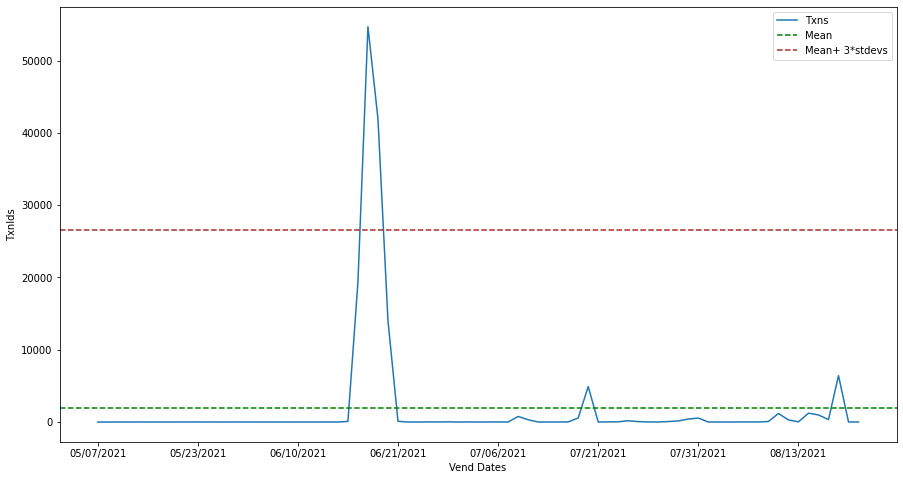

In [549]:
sp.loc[sp.machine_id== sp1.loc[sp1.Txns== sp1.Txns.max(),'machine_id'].values[0]].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8))
plt.axhline(y=1936, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')

plt.axhline(y=1936+ 3*8194.460848, color='brown', linestyle='--',label='Mean+ 3*stdevs')
plt.legend()

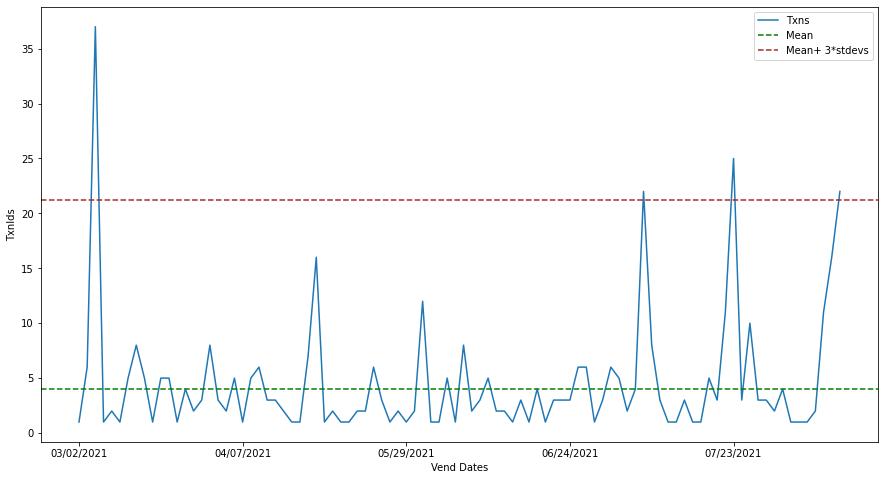

In [550]:
sp.loc[sp.machine_id== '099-CLK'].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8))
plt.axhline(y=4, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')
plt.axhline(y=4+ 3*5.735026, color='brown', linestyle='--', label='Mean+ 3*stdevs')
plt.legend()

In [551]:
sp.loc[sp.machine_id== '000-BWN']

,machine_id,TxnDate,Txns,means,standev,std1,std2,std3,gt_std3
139,000-BWN,07/10/2021,2,1,1.247219,0.444994,0.286169,0.210897,False
140,000-BWN,07/11/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
141,000-BWN,07/16/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
142,000-BWN,07/20/2021,2,1,1.247219,0.444994,0.286169,0.210897,False
143,000-BWN,07/21/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
144,000-BWN,07/22/2021,2,1,1.247219,0.444994,0.286169,0.210897,False
145,000-BWN,07/23/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
146,000-BWN,07/24/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
147,000-BWN,07/28/2021,1,1,1.247219,0.000000,0.000000,0.000000,False
148,000-BWN,07/30/2021,1,1,1.247219,0.000000,0.000000,0.000000,False


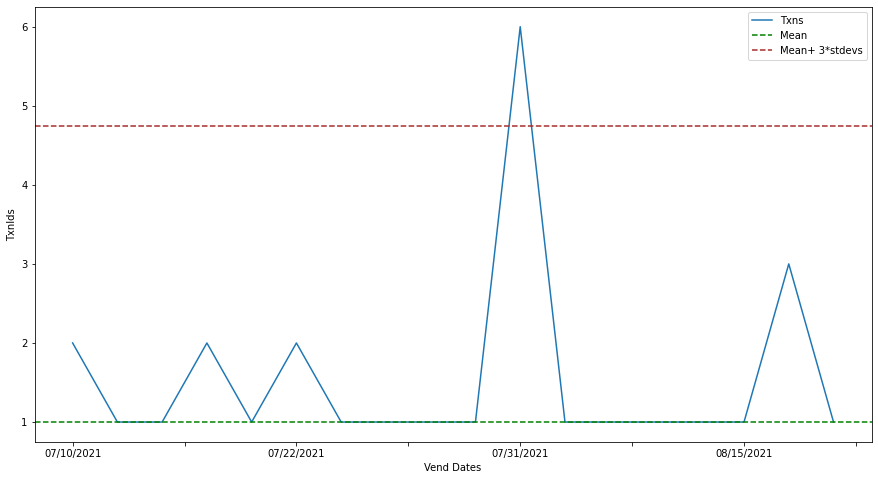

In [552]:
sp.loc[sp.machine_id== '000-BWN'].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8))
plt.axhline(y=1, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')
plt.axhline(y=1+ 3*	1.247219, color='brown', linestyle='--', label='Mean+ 3*stdevs')
plt.legend()

In [553]:
gt3= sp.groupby('machine_id')['gt_std3'].sum().reset_index()
std3= sp.groupby('machine_id')['std3', 'Txns'].agg(['min', 'max']).reset_index()
std3['MaxMinDiff']= std3.loc[:, 'std3']['max']- std3.loc[:, 'std3']['min']
std3['MaxMinDiff'].describe(percentiles=[.05,.25,.75,.95,.99,.999])

count    28007.000000
mean         0.871855
std          0.462257
min          0.000000
5%           0.000000
25%          0.579796
50%          0.868261
75%          1.150598
95%          1.614900
99%          2.133585
99.9%        3.031375
max          3.946077
Name: MaxMinDiff, dtype: float64

In [554]:
std3.loc[std3.machine_id=='419-GHT']

machine_id      std3           Txns         MaxMinDiff
                       min       max  min     max           
11681    419-GHT -0.359047  0.730013    1  123088    1.08906

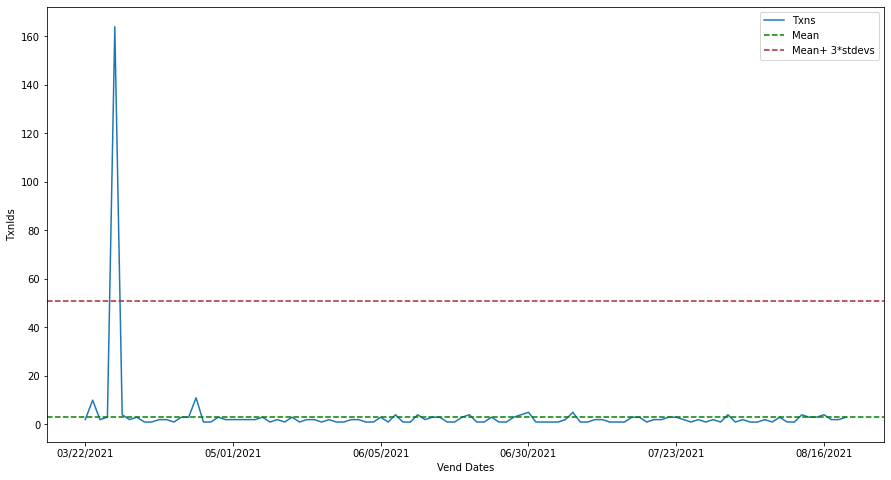

In [555]:
# sp.loc[sp.machine_id== '716-BLB']
sp.loc[sp.machine_id== '716-BLB'].plot(kind= 'line', x='TxnDate', y='Txns', figsize=(15, 8))
plt.axhline(y=3, color='green', linestyle='--', label='Mean')
plt.xlabel('Vend Dates')
plt.ylabel('TxnIds')
plt.axhline(y=3+ 3*15.944683, color='brown', linestyle='--', label='Mean+ 3*stdevs')
plt.legend()

In [556]:
# std3.loc[std3.MaxMinDiff > 3.03, 'machine_id']
# gt3.gt_std3.value_counts()

# Aggregate Measures



In [557]:
df= pd.read_csv('/content/DFORE153D108206m.csv')
len(df.machine_id)-len(df.machine_id.unique())

11453

In [558]:
df.sort_values(['machine_id', 'TimeLength'], ascending= False, inplace= True)
df.drop_duplicates('machine_id', keep='first', inplace= True)
df.loc[df.machine_id=='708-BZW']

,machine_id,machine_type,controller_type,NonCashTotTxn,BaseCycles,TopOffs,TotCorr,TotTxn,LastTxnDate,FirstTxnDate,TimeLength
27642,708-BZW,Dryer,hybrid,0,0,349110,349110,349110,2021-08-16 18:54:52.0000000,2021-07-31 08:17:38.0000000,17


In [559]:
df['Txn2CorrRatio']= df['TotTxn'].divide(df['TotCorr'])
df['TopOffProportion']= df.TopOffs.divide(df['BaseCycles']+df.TopOffs)
df['TxnDailyAvg']= df.TotTxn.divide(df.TimeLength)
df['cash2AllTxnRatio']= (df.TotTxn-df.NonCashTotTxn)/df.TotTxn

In [560]:
std3.columns= ['machine_id', 'std3_min', 'std3_max', 'txns_min', 'txns_max', 'MaxMinDiff']
# df2= df.merge(std3, how= 'left', left_on='machine_id', right_on='machine_id')

## Features:
- `'Txn2CorrRatio'`: TxnIds per Correlation_ID
- `'TopOffProportion'`: Proportion of Top off at a machine
- `'TxnDailyAvg'`: 
- `'cash2AllTxnRatio'`: 
- `'std3'`: 

In [561]:
df2= df.merge(std3, how= 'left', left_on='machine_id', right_on='machine_id')
print(df2.columns)
features= [ 'TxnDailyAvg','TopOffProportion','MaxMinDiff','Txn2CorrRatio', 'cash2AllTxnRatio']
df2.dropna(inplace=True)
print(df2.shape)
df2= df2.loc[df2.controller_type!= 'unknown']

Index(['machine_id', 'machine_type', 'controller_type', 'NonCashTotTxn',
       'BaseCycles', 'TopOffs', 'TotCorr', 'TotTxn', 'LastTxnDate',
       'FirstTxnDate', 'TimeLength', 'Txn2CorrRatio', 'TopOffProportion',
       'TxnDailyAvg', 'cash2AllTxnRatio', 'std3_min', 'std3_max', 'txns_min',
       'txns_max', 'MaxMinDiff'],
      dtype='object')
(12290, 20)


In [562]:
# comp_pct= df2.loc[:,features].rank(ascending=False, pct=False).sum(axis=1).rank(ascending=False, pct=True)

In [563]:
df2.controller_type.unique()

array(['hybrid', 'MDC', 'ACA', 'ACA-A1', 'Maytag', 'QPRO'], dtype=object)

## Algorithm 1

In [564]:
df2['SumRank']= df2.groupby(['machine_type', 'controller_type'])[features].rank("dense", ascending=True, pct=True).sum(axis=1)

In [565]:
pctLst= ['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%', '55%', '60%', '65%', '70%', '75%', '80%', '85%', '90%', '95%', '99%', '99.5%', '99.9%', '100%']
pcts= [.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8, .85,.9,.95,.99, .995,.999, 1]

In [566]:
recs=[]
for i in range(len(pcts)):
  # print(pctLst[i], pcts[i], df2.SumRank.describe(percentiles=[pcts[i]])[pctLst[i]])
  cut= df2.SumRank.describe(percentiles=[pcts[i]])[pctLst[i]]
  TotTxnIds= df2.loc[df2.SumRank <= cut, 'TotTxn'].sum()
  print(pctLst[i], pcts[i], cut, TotTxnIds)
  recs.append([pctLst[i], pcts[i], cut, TotTxnIds])

5% 0.05 0.3560417835867711 4107
10% 0.1 0.5817704447091052 10417
15% 0.15 0.7858362577901313 18389
20% 0.2 0.9829640567823485 30324
25% 0.25 1.0938128758020536 39962
30% 0.3 1.1836985013950916 48991
35% 0.35 1.2904566689463088 60840
40% 0.4 1.3934758314928746 73134
45% 0.45 1.5112464997990138 87704
50% 0.5 1.636891578232834 104383
55% 0.55 1.7735867273091714 122822
60% 0.6 1.9071911575571274 145414
65% 0.65 2.067116243394087 170495
70% 0.7 2.278165506397591 194383
75% 0.75 2.498549717549138 218279
80% 0.8 2.8001550783267826 246728
85% 0.85 3.0741383136089264 272845
90% 0.9 3.3881681335129405 302898
95% 0.95 3.7775816416593115 352449
99% 0.99 4.390523187762557 576084
99.5% 0.995 4.604544197840633 584305
99.9% 0.999 4.89878092025428 1602486
100% 1 4.9952153110047846 2005752


In [567]:
fin= pd.DataFrame.from_records(recs)
fin.columns=['PercentileLabel', 'Percentile', 'PercentileValueCutOff', 'TotalTxnIds']
fin['TotalTxnIds%']= fin.TotalTxnIds/ fin.TotalTxnIds.max()

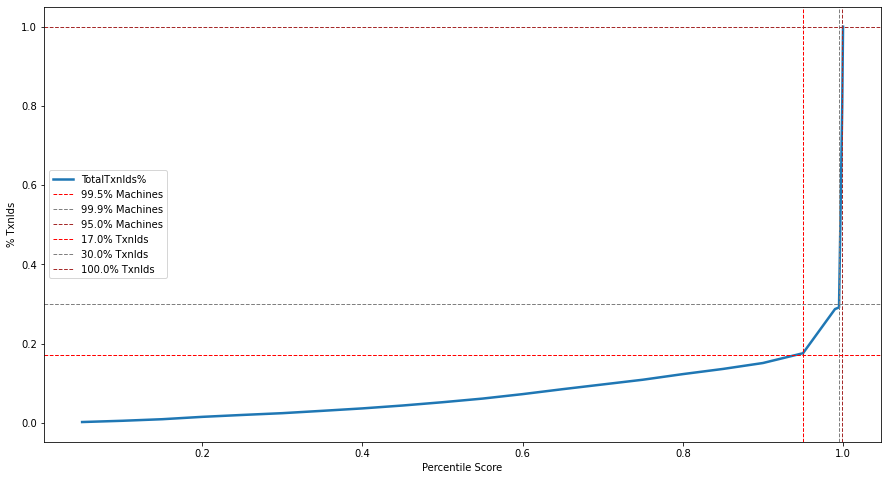

In [568]:
fin.plot('Percentile', 'TotalTxnIds%', kind= 'line', figsize=(15,8), linewidth=2.5)
plt.xlabel('Percentile Score')
plt.ylabel('% TxnIds')
plt.axvline(x=.95, color='red', linestyle='--', label='99.5% Machines', linewidth=1)
plt.axvline(x=.995, color='gray', linestyle='--', label='99.9% Machines', linewidth=1)
plt.axvline(x=.999, color='brown', linestyle='--', label='95.0% Machines', linewidth=1)
plt.axhline(y=.17, color='red', linestyle='--', label='17.0% TxnIds', linewidth=1)
plt.axhline(y=.3, color='gray', linestyle='--', label='30.0% TxnIds', linewidth=1)
plt.axhline(y=1, color='brown', linestyle='--', label='100.0% TxnIds', linewidth=1)
plt.legend()

In [569]:
cut95= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['95%']
cut99= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['99%']
cut995= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['99.5%']
cut999= df2.SumRank.describe(percentiles=[.05,.1,.15,.2,.25, .3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.85,.9,.95,.99, .995,.999])['99.9%']
df2.loc[df2.SumRank > cut95, 'pct_flg']= '>95pct'
df2.loc[df2.SumRank > cut99, 'pct_flg']= '>99pct'
df2.loc[df2.SumRank > cut995, 'pct_flg']= '>99.5pct'
df2.loc[df2.SumRank > cut999, 'pct_flg']= '>99.9pct'
df2.pct_flg.fillna('<=95pct', inplace=True)

In [570]:
map_dict= dict(zip(df2.pct_flg.unique().tolist(), ['5. Not Rogue', '4. Low Risk', '2. High Risk', '1. High Risk- Critical', '3. Moderate Risk']))
df2['priority']= df2.pct_flg.map(map_dict)
df2.priority.value_counts()

5. Not Rogue              11679
4. Low Risk                 487
1. High Risk- Critical       61
2. High Risk                 49
3. Moderate Risk             13
Name: priority, dtype: int64

In [571]:
pd.crosstab(df2.controller_type, df2.priority, margins=True)

priority,1. High Risk- Critical,2. High Risk,3. Moderate Risk,4. Low Risk,5. Not Rogue,All
controller_type,,,,,,
ACA,24,12,4,160,3620,3820
ACA-A1,1,1,0,3,65,70
MDC,13,12,4,195,4916,5140
Maytag,0,0,0,4,36,40
QPRO,4,3,1,17,538,563
hybrid,19,21,4,108,2504,2656
All,61,49,13,487,11679,12289


In [572]:
df2.loc[df2.SumRank >= df2.SumRank.describe(percentiles=[.99])['99%'],'machine_id'].to_csv('A1 MchineIds 99pct cutoff.txt')

In [573]:
df2.loc[df2.SumRank > .99].controller_type.value_counts()

MDC       4203
ACA       2822
hybrid    2276
QPRO       406
ACA-A1      67
Maytag      35
Name: controller_type, dtype: int64

## BrightAI list

In [595]:
bf= pd.read_csv('/content/BadActors.csv')

In [597]:
bf.columns

Index(['Date_Noticed', 'Date_Added', 'aiHubId', 'licensePlate', 'locationId',
       'roomId', 'Reason', 'Present_UDM', 'is_latest'],
      dtype='object')

In [600]:
bf.drop_duplicates('licensePlate', keep= 'first', inplace=True)

In [623]:
bf['Spams']= bf.Reason.str.lower().str.contains('spam')

In [624]:
df3= df2.merge(bf.loc[:,['licensePlate', 'Spams']], how= 'left', left_on='machine_id', right_on='licensePlate')

In [625]:
df3.Spams.fillna('Not in BrightAI list', inplace=True)

In [627]:
pd.crosstab(df3.controller_type, df3.priority)

priority,1. High Risk- Critical,2. High Risk,3. Moderate Risk,4. Low Risk,5. Not Rogue
controller_type,,,,,
ACA,24,12,4,160,3620
ACA-A1,1,1,0,3,65
MDC,13,12,4,195,4916
Maytag,0,0,0,4,36
QPRO,4,3,1,17,538
hybrid,19,21,4,108,2504


In [574]:
df2.controller_type.value_counts()

MDC       5140
ACA       3820
hybrid    2656
QPRO       563
ACA-A1      70
Maytag      40
Name: controller_type, dtype: int64

## Algorithm 2

In [575]:
features

['TxnDailyAvg',
 'TopOffProportion',
 'MaxMinDiff',
 'Txn2CorrRatio',
 'cash2AllTxnRatio']

In [576]:
df.groupby(['machine_type', 'controller_type']).size()

machine_type  controller_type
Dryer         ACA                1626
              ACA-A1                3
              MDC                3170
              Maytag               19
              QPRO                251
              hybrid             1676
              unknown               1
Washer        ACA                2470
              ACA-A1               77
              MDC                2253
              Maytag               23
              QPRO                350
              hybrid             1593
dtype: int64

In [577]:
df2= df2.loc[df2.controller_type!= 'unknown']

In [578]:
featRank= []
for f in features:
  df2[f+'_rnk']= pd.qcut(df2.loc[:, f].rank(method='first', ascending= True), 100, labels=range(100))
  featRank.append(f+'_rnk')
  # df2['NumRnkCat']= None
# df2['NumRnkSum']= 0
  # df2['NumRnkCat']= df2['NumRnkCat']+df2[f+'_rnk'].astype(str)+'|'
  # df2['NumRnkSum']= df2['NumRnkSum']+ df2[f+'_rnk']

In [579]:
df2['NumRnkSum']= df2.loc[:, featRank].sum(axis=1)

In [580]:
df2['NumRnkCat']= df2.loc[:, featRank].astype('str').agg('|'.join, axis=1)

In [581]:
df2['NumRnkSumPct']= df2['NumRnkSum'].rank(ascending=True, pct=True)

In [582]:
df2.loc[df2.NumRnkSumPct> .99, 'machine_id'].to_csv('A2 MchineIds 99pct cutoff.txt.csv')

In [583]:
df2.loc[df2.NumRnkSumPct> .99, ['machine_id', 'NumRnkCat']]

,machine_id,NumRnkCat
1742,DXN-348,97|94|87|96|74
2189,990-BTD,94|94|94|99|75
2251,987-FRS,98|91|92|98|73
2273,986-FRS,94|92|88|98|75
2298,985-FRS,98|90|98|98|71
...,...,...
29978,030-BPV,99|96|79|99|73
30386,016-GKM,92|88|94|82|99
30405,015-HMK,89|76|95|93|99
30417,015-GKM,94|88|86|81|99


In [584]:
df2.groupby(['machine_type', 'controller_type'])[features].rank("dense", ascending=True, pct=True).sum(axis=1)

2        2.128093
3        2.434721
8        2.196143
12       0.640184
17       2.233453
           ...   
30873    0.662098
30874    1.025983
30876    2.483295
30877    2.267679
30879    1.086191
Length: 12289, dtype: float64

In [585]:
recs=[]
for i in range(len(pcts)):
  # print(pctLst[i], pcts[i], df2.SumRank.describe(percentiles=[pcts[i]])[pctLst[i]])
  cut= df2.NumRnkSumPct.describe(percentiles=[pcts[i]])[pctLst[i]]
  TotTxnIds= df2.loc[df2.NumRnkSumPct <= cut, 'TotTxn'].sum()
  print(pctLst[i], pcts[i], cut, TotTxnIds)
  recs.append([pctLst[i], pcts[i], cut, TotTxnIds])

5% 0.05 0.04996338188623973 3052
10% 0.1 0.1012287411506225 7206
15% 0.15 0.14968671169338432 12598
20% 0.2 0.20017902188949466 19247
25% 0.25 0.2501424037757344 26711
30% 0.3 0.298885181869965 35505
35% 0.35 0.348441695825535 45659
40% 0.4 0.39925950036618113 57759
45% 0.45 0.4515013426641712 73381
50% 0.5 0.5018309056880137 94281
55% 0.55 0.5488241516803646 109999
60% 0.6 0.5980958580844657 128586
65% 0.65 0.6510293758645943 152449
70% 0.7 0.7003010822686956 173000
75% 0.75 0.7512816339816095 197511
80% 0.8 0.8009602083163805 300035
85% 0.85 0.8501098543412808 334933
90% 0.9 0.8995443079176499 371348
95% 0.95 0.9501993652860281 808258
99% 0.99 0.9899910489055253 920726
99.5% 0.995 0.9950557409065015 945842
99.9% 0.999 0.9990173325738467 1971249
100% 1 1.0 2005752


In [586]:
fin1= pd.DataFrame.from_records(recs)
fin1.columns=['PercentileLabel', 'Percentile', 'PercentileValueCutOff', 'TotalTxnIds']
fin1['TotalTxnIds%']= fin.TotalTxnIds/ fin.TotalTxnIds.max()

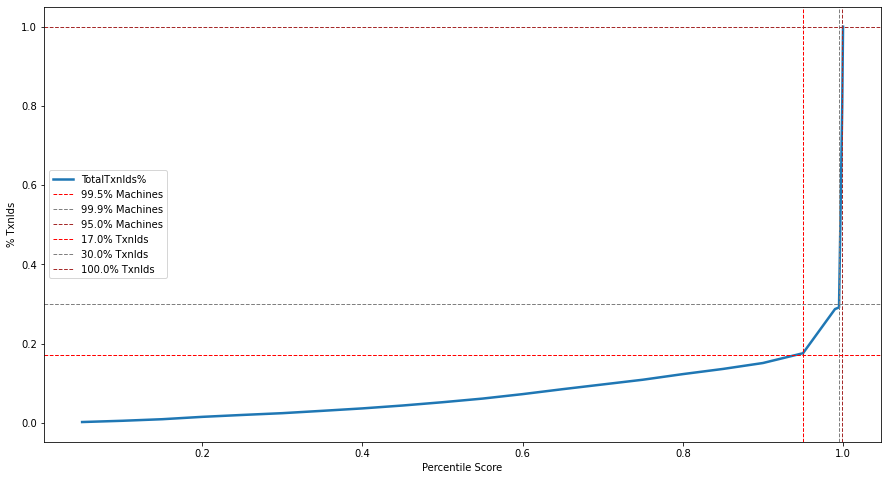

In [587]:
fin1.plot('Percentile', 'TotalTxnIds%', kind= 'line', figsize=(15,8), linewidth=2.5)
plt.xlabel('Percentile Score')
plt.ylabel('% TxnIds')
plt.axvline(x=.95, color='red', linestyle='--', label='99.5% Machines', linewidth=1)
plt.axvline(x=.995, color='gray', linestyle='--', label='99.9% Machines', linewidth=1)
plt.axvline(x=.999, color='brown', linestyle='--', label='95.0% Machines', linewidth=1)
plt.axhline(y=.17, color='red', linestyle='--', label='17.0% TxnIds', linewidth=1)
plt.axhline(y=.3, color='gray', linestyle='--', label='30.0% TxnIds', linewidth=1)
plt.axhline(y=1, color='brown', linestyle='--', label='100.0% TxnIds', linewidth=1)
plt.legend()

## Segment Cohorts

In [90]:
df3=df2.loc[df2.machine_type== 'Dryer'].groupby('controller_type')[features].describe(percentiles=pcts).stack(level=0)

In [92]:
df4=df2.loc[df2.machine_type== 'Washer'].groupby('controller_type')[features].describe(percentiles=pcts).stack(level=0)

In [58]:
# df4

In [104]:
df5=df2.groupby(['machine_type', 'controller_type'])[features].describe(percentiles=pcts).stack(level=0).loc[:,pctLst]

In [77]:
df6= pd.DataFrame(index=df5.index)

In [ ]:
df2.fillna(0, inplace=True)

### Algorithm 3

In [100]:
df5.loc[m,c,f].loc['99.5%']

1.0

In [112]:
for f in features:
  df2[f+'_flg']= 0
  for row in df2.items():
      print(row[])
      

machine_id
machine_type
controller_type
NonCashTotTxn
BaseCycles
TopOffs
TotCorr
TotTxn
LastTxnDate
FirstTxnDate
TimeLength
Txn2CorrRatio
TopOffProportion
TxnDailyAvg
cash2AllTxnRatio
std3_min
std3_max
txns_min
txns_max
MaxMinDiff
SumRank
pct_flg
priority
TxnDailyAvg_flg
TopOffProportion_flg
MaxMinDiff_flg
Txn2CorrRatio_flg
cash2AllTxnRatio_flg
machine_id
machine_type
controller_type
NonCashTotTxn
BaseCycles
TopOffs
TotCorr
TotTxn
LastTxnDate
FirstTxnDate
TimeLength
Txn2CorrRatio
TopOffProportion
TxnDailyAvg
cash2AllTxnRatio
std3_min
std3_max
txns_min
txns_max
MaxMinDiff
SumRank
pct_flg
priority
TxnDailyAvg_flg
TopOffProportion_flg
MaxMinDiff_flg
Txn2CorrRatio_flg
cash2AllTxnRatio_flg
machine_id
machine_type
controller_type
NonCashTotTxn
BaseCycles
TopOffs
TotCorr
TotTxn
LastTxnDate
FirstTxnDate
TimeLength
Txn2CorrRatio
TopOffProportion
TxnDailyAvg
cash2AllTxnRatio
std3_min
std3_max
txns_min
txns_max
MaxMinDiff
SumRank
pct_flg
priority
TxnDailyAvg_flg
TopOffProportion_flg
MaxMinDiff_fl

In [ ]:
df2['AllFlags']=df2.loc[:,['Txn2CorrRatio_flg', 'TopOffProportion_flg', 'TxnDailyAvg_flg', 'cash2AllTxnRatio_flg', 'gt_std3_flg']].sum(axis=1)

In [ ]:
df2.head()

,machine_id,machine_type,controller_type,NonCashTotTxn,BaseCycles,TopOffs,TotCorr,TotTxn,LastTxnDate,FirstTxnDate,TimeLength,Txn2CorrRatio,TopOffProportion,TxnDailyAvg,cash2AllTxnRatio,gt_std3,Txn2CorrRatio_flg,TopOffProportion_flg,TxnDailyAvg_flg,cash2AllTxnRatio_flg,gt_std3_flg,AllFlags
0,034-GFX,Washer,ACA,6,37,0,37,37,2021-08-19 22:42:32.0000000,2021-07-31 15:10:50.0000000,20,1.000000,0.000000,1.850000,0.837838,0,NaN,NaN,1.0,NaN,NaN,1.0
1,937-JHT,Dryer,hybrid,7,7,4,11,11,2021-08-18 23:02:55.3880000,2021-07-18 02:38:45.7340000,32,1.000000,0.363636,0.343750,0.363636,0,NaN,1.0,NaN,NaN,NaN,1.0
2,420-BZP,Dryer,MDC,0,42,36,70,78,2021-08-19 18:51:41.0000000,2021-07-29 12:23:48.0000000,22,1.114286,0.461538,3.545455,1.000000,1,1.0,1.0,1.0,1.0,1.0,5.0
3,286-HFF,Dryer,unknown,4,142,188,143,330,2021-08-19 23:06:58.0000000,2021-04-15 21:04:15.0000000,127,2.307692,0.569697,2.598425,0.987879,1,1.0,1.0,1.0,1.0,1.0,5.0
4,535-DRJ,Washer,unknown,22,22,0,22,22,2021-08-20 01:43:59.8930000,2021-06-20 14:23:30.5760000,62,1.000000,0.000000,0.354839,0.000000,0,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
df2.loc[df2.machine_id=='419-GHT']

,machine_id,machine_type,controller_type,NonCashTotTxn,BaseCycles,TopOffs,TotCorr,TotTxn,LastTxnDate,FirstTxnDate,TimeLength,Txn2CorrRatio,TopOffProportion,TxnDailyAvg,cash2AllTxnRatio,gt_std3,Txn2CorrRatio_flg,TopOffProportion_flg,TxnDailyAvg_flg,cash2AllTxnRatio_flg,gt_std3_flg,AllFlags
22599,419-GHT,Washer,ACA,18,39,811738,23458,811777,2021-08-16 17:58:12.4650000,2021-07-23 20:17:39.0000000,25,34.60555,0.999952,32471.08,0.999978,0,1.0,1.0,1.0,1.0,NaN,4.0


In [ ]:
df2.AllFlags.value_counts()

1.0    7221
2.0    5681
4.0    5493
3.0    5236
0.0    2292
5.0    1259
Name: AllFlags, dtype: int64

In [ ]:
df2['NoCashRatioFlags']=df2.loc[:,['Txn2CorrRatio_flg', 'TopOffProportion_flg', 'TxnDailyAvg_flg','gt_std3_flg']].sum(axis=1)

In [ ]:
df2.NoCashRatioFlags.value_counts()

1.0    8356
3.0    5987
2.0    5108
4.0    4910
0.0    2821
Name: NoCashRatioFlags, dtype: int64

In [ ]:
1300/27000

0.04814814814814815